# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Link al repositorio donde se encuentra alojado el proyecto. <br>

- https://github.com/outaCtrl/DataScience.git

In [89]:
#Comienzo importando las librerias necesarias para comenzar el trabajo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [90]:
# Importo dataset de desarrollo
data_dev = pd.read_json('dataset_amazon/dataset_es_dev.json', lines = True)
print("- Registros del set dev:", data_dev.shape[0])

# Importo dataset de entrenamiento
data_train = pd.read_json('dataset_amazon/dataset_es_train.json', lines = True)
print("- Registros del set train:", data_train.shape[0])

# Importo dataset de prueba
data_test = pd.read_json('dataset_amazon/dataset_es_test.json', lines = True)
print("- Registros del set test:", data_test.shape[0])

- Registros del set dev: 5000
- Registros del set train: 200000
- Registros del set test: 5000


##### Como el set dev y el set test tienen menor cantidad de registros al set train, voy a unir los datasets con el train_test_split y tomar un 30% para test más adelante. <br> <br>Esto además permite reducir la carga de entrenamiento.

In [91]:
# Concateno todos.
data = pd.concat([data_dev, data_train, data_test])
data = data.reset_index(drop=True)
print("- Registros del dataset:", data.shape[0])
print("- Columnas del dataset:", data.shape[1])

- Registros del dataset: 210000
- Columnas del dataset: 8


#####   Exploramos el dataset para entender los datos:

In [92]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [93]:
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
209996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
209997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
209998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports
209999,es_0794544,product_es_0130307,reviewer_es_0651938,5,Pues este tipo de cascos si que son inalambric...,Auriculares sin cables de verdad,es,electronics


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.8+ MB


In [95]:
# Para ver si hay nulos por columna
data.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

<br>

##### Importo las librerías SpaCy y NLTK <br>



Al investigar estas librerias pude notar que ***Spacy*** incluye mayor cantidad de stopwords. En cambio ***NLTK*** es una libreria mas acotada y clasica. <br>


Ambas tienen palabras que nos pueden ser de utilidad para predecir el puntaje de una reseña, por ejemplo 'no', 'bueno', 'buena', 'buen'. <br>


En este proyecto voy a utilizar ***SpaCy*** por ser más completa, pero no descarto la posibilidad de entrenarlo con las stopwords de ***NLTK*** para evaluar si mejora en algo. <br>


Alternare de librerías para los distintos procesos según la facilidad con la que se pueda utilizar cada una.

In [96]:
import spacy
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

# Se quitan de las stopwords palabras como 'no', 'bueno', 'buena' que pueden ser últiles para predecir
stopwords_spacy.remove('no') 
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')
stopwords_spacy.remove('bien')
stopwords_spacy.remove('buenos')
stopwords_spacy.remove('tarde')
stopwords_spacy.remove('temprano')
stopwords_spacy.remove('día')
stopwords_spacy.remove('días')
stopwords_spacy.remove('dia')
stopwords_spacy.remove('dias')
stopwords_spacy.remove('grandes')
stopwords_spacy.remove('general')

In [97]:
#Stop Words de nltk
import nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('spanish'))

# Quito de las stopwords la palabra 'no', que nos puede ser últil para predecir
stopwords_nltk.remove('no')

In [98]:
# Para manejo de resgitros de texto
import re
from nltk.tokenize import RegexpTokenizer

#Constante de signos de puntuación
import string
puntua = string.punctuation + '¡¿...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X','PROPN']

## Análisis Exploratorio de Datos

1. ¿Que cantidad de productos hay por categoria en el dataset?
2. ¿Que cantidad de reseñas tiene cada categoria agrupadas por cantidad de estrellas?
3. ¿Cuál es el promedio de estrellas por cada categoría?
4. ¿Que cantidad de reseñas hay por cada categoría?
5. ¿Que cantidad de reseñas hay por cada valoración? 
6. ¿Cuántos usuarios únicos publicaron en este dataset?  
7. ¿Cuántos productos únicos aparecen en las reseñas? 
8. -Se analizara la actividad de un usuario random. 
9. ¿Cuáles son las palabras con mayor frecuencia por cada valoración?  

***1. ¿Que cantidad de productos hay por categoria en el dataset?***

In [99]:
data.product_category.value_counts()

home                        28328
wireless                    27208
toy                         14328
sports                      13856
pc                          11720
home_improvement            11468
electronics                 10899
beauty                       7707
automotive                   7495
kitchen                      7028
apparel                      6014
drugstore                    5778
book                         5528
furniture                    5481
baby_product                 5098
office_product               5010
lawn_and_garden              4449
other                        4131
pet_products                 3899
personal_care_appliances     3735
luggage                      3509
camera                       3180
shoes                        2886
digital_ebook_purchase       1936
video_games                  1818
jewelry                      1677
musical_instruments          1608
watch                        1567
industrial_supplies          1552
grocery       

***2. ¿Que cantidad de reseñas tiene cada categoria agrupadas por cantidad de estrellas?***

In [100]:
data_grouped = data.review_id.groupby([data['product_category'],data['stars']]).count().astype(int).reset_index(name='count')
data_grouped

,product_category,stars,count
0,apparel,1,1324
1,apparel,2,1271
2,apparel,3,1263
3,apparel,4,1177
4,apparel,5,979
...,...,...,...
145,wireless,1,6605
146,wireless,2,5972
147,wireless,3,5046
148,wireless,4,4844


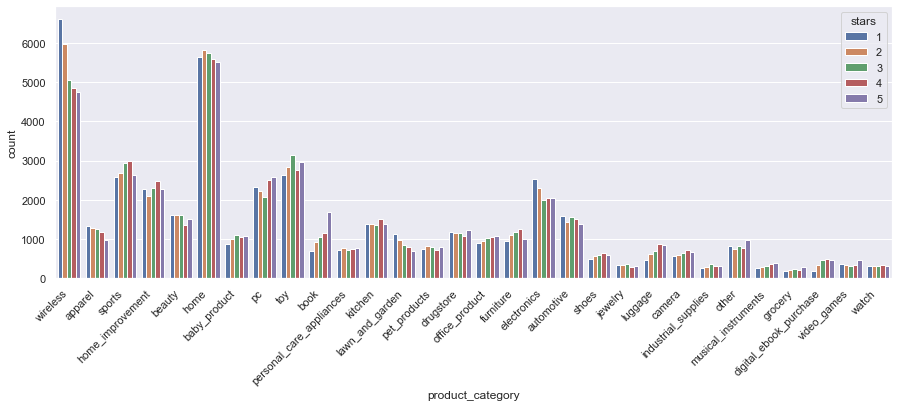

In [101]:
#Grafico 
plt.figure(figsize=(15,5))
grafico = sns.countplot(x=data['product_category'],data=data, hue='stars')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

***3. ¿Cuál es el promedio de estrellas por cada categoría?***


La media debería dar alrededor de 3, pero aquellos que estén por encima significa que fueron en su mayoría mejor calificados. Inversamente sucede con los que están por debajo de 3, lo que significa que fueron en su mayoría mal calificados.

In [102]:
# Promedio de estrellas por categoría ordenados de forma ascendente
from statistics import mean
data_grouped = data.stars.groupby([data['product_category']]).mean().reset_index(name='avg_stars')
data_grouped['rev_count'] = data.stars.groupby([data['product_category']]).count().astype(int).reset_index(name='rev_count').rev_count
data_grouped.sort_values(by='avg_stars')

,product_category,avg_stars,rev_count
16,lawn_and_garden,2.763093,4449
29,wireless,2.821523,27208
0,apparel,2.869638,6014
8,electronics,2.891091,10899
14,jewelry,2.929636,1677
3,beauty,2.940574,7707
1,automotive,2.955704,7495
11,home,2.982526,28328
28,watch,2.994895,1567
23,pet_products,2.996409,3899


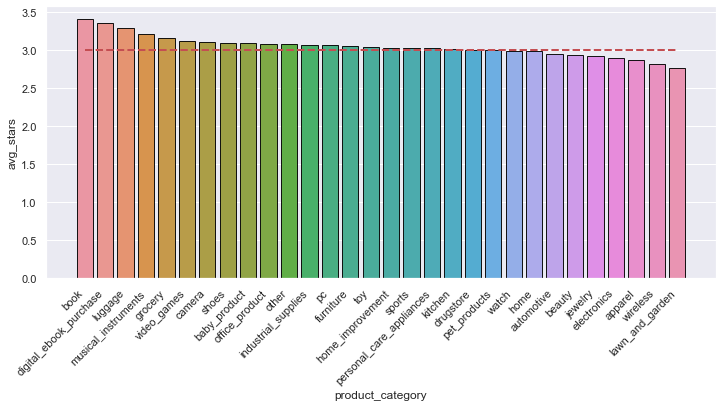

In [103]:
# Grafico de la valoración promedio por categoría
data_grouped.sort_values(['avg_stars','rev_count'],ascending=False,inplace=True)
cte = np.ones(data_grouped.shape[0])*3 # Valor medio
plt.figure(figsize=(12,5))
grafico = sns.barplot(x=data_grouped.product_category, y=data_grouped.avg_stars, linewidth=0.9,edgecolor=(0,0,0))
plt.plot(cte, ls = '--', lw = 2, c='r',label = 'Valoración media')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()


***4. ¿Que cantidad de reseñas hay por cada categoría?***

Esto permitirá dar contexto a los promedios previamente obtenidos.

<AxesSubplot:title={'center':'Cantidad de reviews por categoría'}, xlabel='Categoría', ylabel='Cantidad de reseñas'>

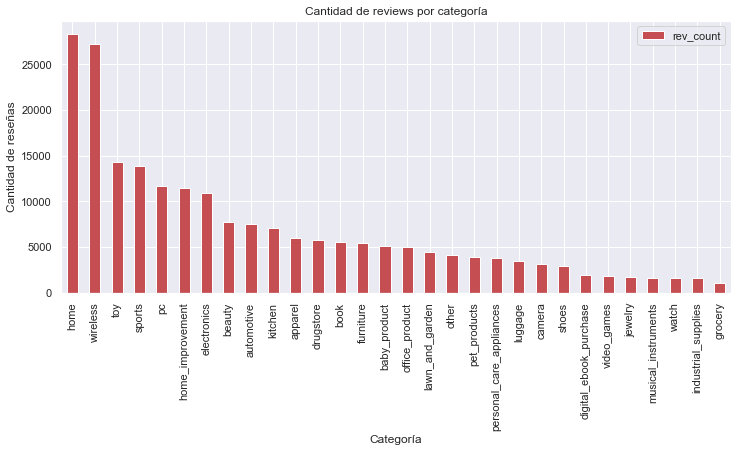

In [104]:
data_grouped.sort_values(by='rev_count',ascending=False).plot(x='product_category',y='rev_count',kind='bar',figsize=(12,5),title='Cantidad de reviews por categoría', xlabel='Categoría', ylabel='Cantidad de reseñas', color= 'r')

***5. ¿Que cantidad de reseñas hay por cada valoración?***

In [105]:
data.stars.value_counts()

1    42000
2    42000
3    42000
4    42000
5    42000
Name: stars, dtype: int64

Vemos que está equilibrada la cantidad de cada una.

***6. ¿Cuántos usuarios únicos publicaron en este dataset?***

In [106]:
unique_usrs = len(data.reviewer_id.unique())
print("En total escribieron", unique_usrs,  "usuarios únicos de las", data.shape[0], "reseñas existentes.")
print("Esto equivale al", unique_usrs*100//data.shape[0], "%")

En total escribieron 187140 usuarios únicos de las 210000 reseñas existentes.
Esto equivale al 89 %


***7. ¿Cuántos productos únicos aparecen en las reseñas?***

In [107]:
unique_prods = len(data.product_id.unique())
print("De las", data.shape[0], "reseñas, se mencionan", unique_prods, "productos únicos.")
print("Esto equivale al", unique_prods*100//data.shape[0], "%")

De las 210000 reseñas, se mencionan 156458 productos únicos.
Esto equivale al 74 %


***8. Se analizara la actividad de un usuario random.***

In [108]:
rand_idx = np.random.randint(0,data.shape[0])
usr = data.reviewer_id.iloc[rand_idx]
usr_data = data[data.reviewer_id == usr]
print("Cantidad de reseñas de", usr,":", len(usr_data))
print("Promedio de estrellas otorgado:", usr_data.stars.mean())
usr_data[['reviewer_id','product_category','review_title','review_body','stars']]

Cantidad de reseñas de reviewer_es_0163167 : 1
Promedio de estrellas otorgado: 3.0


,reviewer_id,product_category,review_title,review_body,stars
116253,reviewer_es_0163167,furniture,El tamaño,Le falta más espacio,3


In [109]:
print("Título:", usr_data.review_title.iloc[0])
print("Reseña:", usr_data.review_body.iloc[0])

Título: El tamaño
Reseña: Le falta más espacio


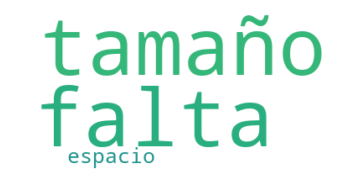

In [110]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',stopwords=stopwords_nltk).generate(usr_data.review_title.iloc[0] + ' ' + usr_data.review_body.iloc[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Con una sola reseña se puede apreciar que el WorldCloud no es eficiente, ya que lo mas probable es que no haya palabras repetidas.<br>
##### Se juntaran las reseñas agrupandolas por cantidad de estrellas.

***9. ¿Cuáles son las palabras con mayor frecuencia por cada valoración?***

In [111]:
# Separamos en distintos dataframes las reviews según valoración
data_star_1 = data[data['stars']==1]
data_star_2 = data[data['stars']==2]
data_star_3 = data[data['stars']==3]
data_star_4 = data[data['stars']==4]
data_star_5 = data[data['stars']==5]

***Comienzo analizando las reviews de 1 estrella:***<br>
Voy a dejar sólo los adjetivos para mejorar la visualización.


In [112]:
##### todas_reviews_1 = []
for i in data_star_1.index:
    review1 = data_star_1.review_body[i] #seleccionar el titular
    sent = nlp(review1.lower())
    for token in sent:
        if (token.pos_ == "ADJ" and token.text not in stopwords_spacy and len(token.text)>2):
            temp = token.lemma_
            todas_reviews_1.append(temp) #agregar el resultado a la lista

print('- Cantidad de palabras filtradas:',len(todas_reviews_1))
todas_reviews_1[:3]

- Cantidad de palabras filtradas: 131002


['grande', 'aparatoso', 'menor']

In [113]:
# Obtenemos frecuencia de palabras y creamos nuevo df
freq_rev_1 = nltk.FreqDist(todas_reviews_1)
df_rev_frec_1 = pd.DataFrame(freq_rev_1.items(), columns = ['Palabra', 'Frecuencia']) 
df_rev_frec_1.sort_values(by=['Frecuencia'], inplace=True, ascending=False)
df_rev_frec_1.reset_index(drop = True, inplace=True)
df_rev_frec_1.head()

,Palabra,Frecuencia
0,malo,9268
1,pequeño,3784
2,bueno,3268
3,rotar,2130
4,grande,1704


In [114]:
# Vemos la parte inferior
df_rev_frec_1[df_rev_frec_1['Frecuencia']<10]

,Palabra,Frecuencia
1283,casual,8
1284,usarlas,8
1285,indiferente,8
1286,malísimas,8
1287,portatil,8
...,...,...
4462,vinagre,2
4463,hervir,2
4464,justilla,2
4465,cesto,2


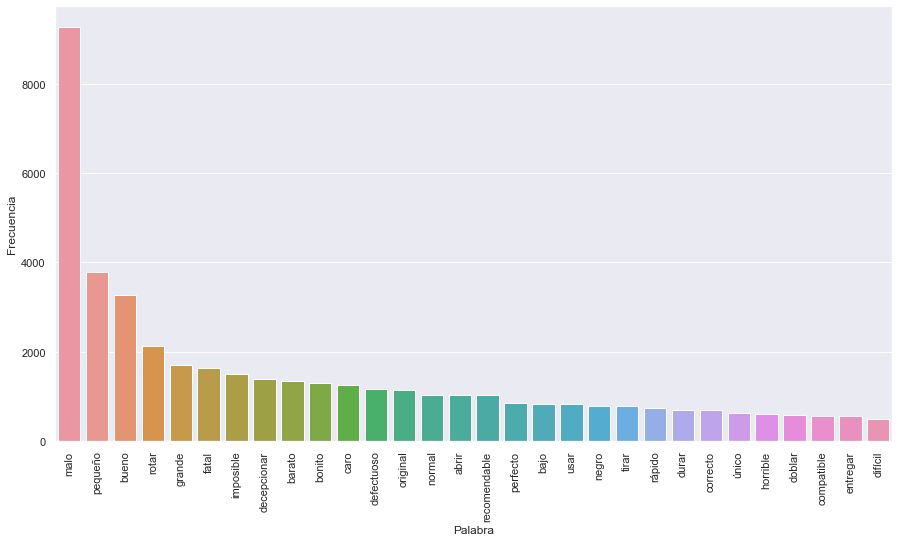

In [115]:
# Grafico de la frecuencia de las palabras en las reviews de 1 estrella
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_1.iloc[:30].Palabra, y = df_rev_frec_1.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

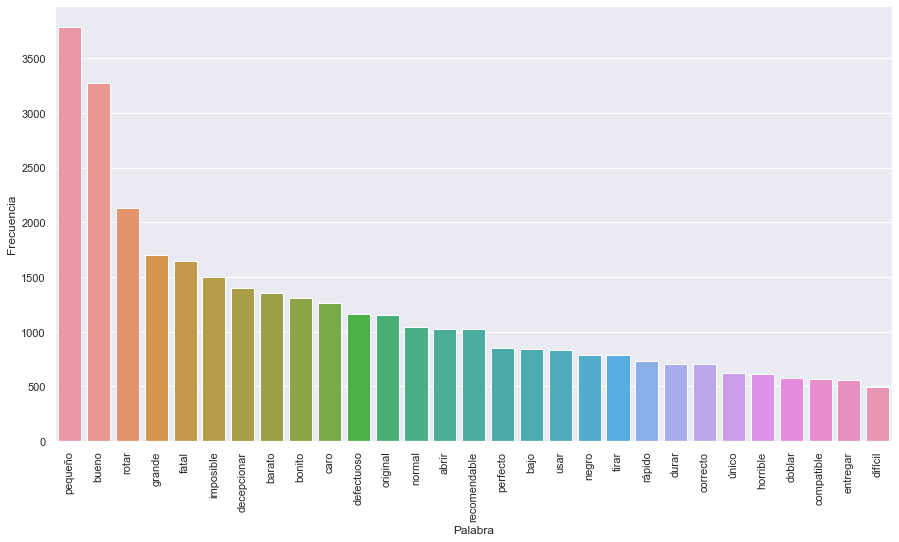

In [116]:
# Saco la palabra 'malo' que es ampliamente más frecuente para visualizar mejor
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_1.iloc[1:30].Palabra, y = df_rev_frec_1.iloc[1:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [117]:
from wordcloud import WordCloud

# Definimos función para ver el wordcloud de una lista de palabras
def ver_wordcloud(palabras):
    text = ' '.join(palabras)
    wordcloud = WordCloud(background_color='white',width=900,height=450).generate(text.strip())
    plt.figure(figsize = (15,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='kaiser')
    plt.axis("off")
    plt.show()

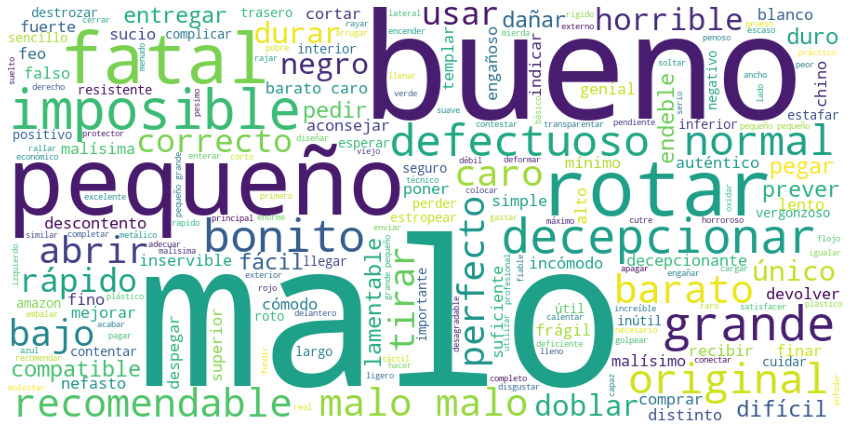

In [118]:
ver_wordcloud(todas_reviews_1)

Palabras como ***perfecto***, ***bonito***, se repiten mucho pero seguramente sea porque están en un contexto negativo y las niegan.

##### Para procesar los restantes dataframes, abstraemos todas las operaciones en dos funciones:

In [119]:
def adj_list(dataframe):
    todas_reviews = []
    for i in dataframe.index:
        review1 = dataframe.review_body[i] #seleccionar el titular
        sent = nlp(review1.lower())
        # review1 = RegexpTokenizer('\w+').tokenize(review1) # Tokenizar con RegexpTokenizer
        for token in sent:            
            if (token.pos_ == "ADJ" and str(token) not in stopwords_spacy and len(token.text)>2):
                temp = token.lemma_
                todas_reviews.append(temp) #agregar el resultado a la lista
    return todas_reviews

def adj_frecquency_df(todas_reviews):
    # plain_todas_reviews = list(itertools.chain(*todas_reviews)) # Aplanar la lista
    freq_revs = nltk.FreqDist(todas_reviews) # Obtener frecuencia por palabra
    df_revs = pd.DataFrame(freq_revs.items(), columns = ['Palabra', 'Frecuencia']) # Crear nuevo df
    df_revs.sort_values(by=['Frecuencia'], inplace=True, ascending=False) # Ordenar valores por frecuencia
    df_revs.reset_index(drop = True, inplace=True) # Resetear index
    return df_revs

##### Analizo las reviews de 5 estrellas:


In [120]:
# Listo los adjetivos de las reviews con 5 estrellas
todas_reviews_5 = adj_list(data_star_5)

In [121]:
df_rev_frec_5 = adj_frecquency_df(todas_reviews_5)
df_rev_frec_5

,Palabra,Frecuencia
0,bueno,9361
1,perfecto,6782
2,fácil,2734
3,bonito,2686
4,genial,2574
...,...,...
4724,burdeos,1
4725,lindísimo,1
4726,emisor,1
4727,saciante,1


Visualizamos la frecuencia de las palabras en las reviews de 5 estrellas

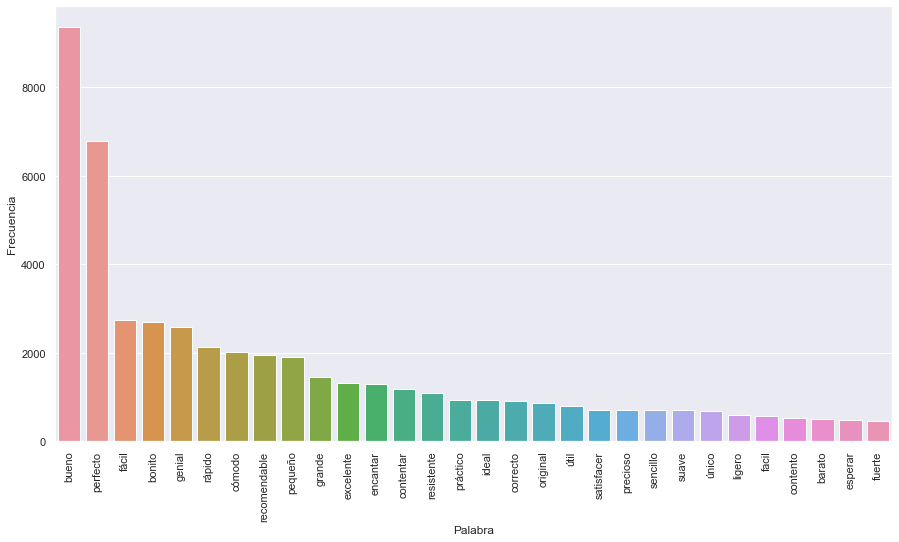

In [122]:
# Genero gráfico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_5.iloc[:30].Palabra, y = df_rev_frec_5.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

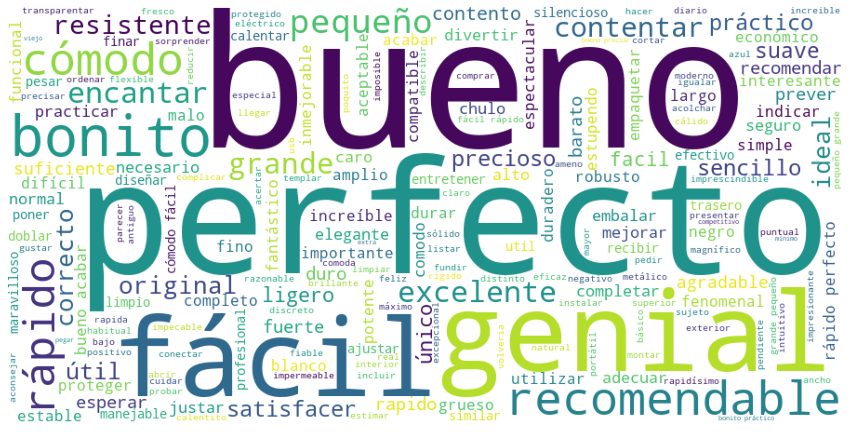

In [123]:
ver_wordcloud(todas_reviews_5)

***Como punto medio, analizo las reviews de 3 estrellas:***

In [125]:
# Listo los adjetivos de las reviews con 3 estrellas
todas_reviews_3 = adj_list(data_star_3)

In [126]:
df_rev_frec_3 = adj_frecquency_df(todas_reviews_3)
df_rev_frec_3

,Palabra,Frecuencia
0,bueno,5348
1,pequeño,3716
2,bonito,2465
3,grande,2317
4,perfecto,1540
...,...,...
4922,telefonicas,1
4923,fossil,1
4924,atrasar,1
4925,carisima,1


Visualizamos la frecuencia de las palabras en las reviews de 3 estrellas

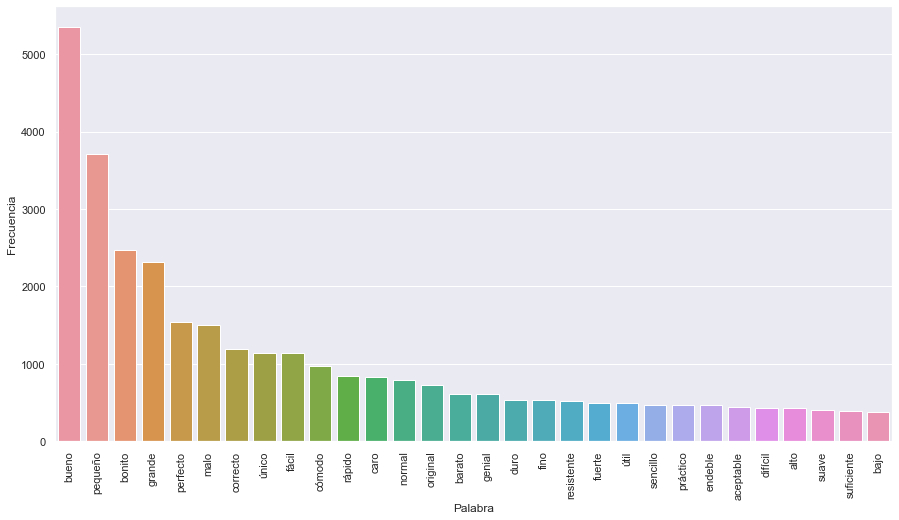

In [127]:
# grafico
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_3.iloc[:30].Palabra, y = df_rev_frec_3.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

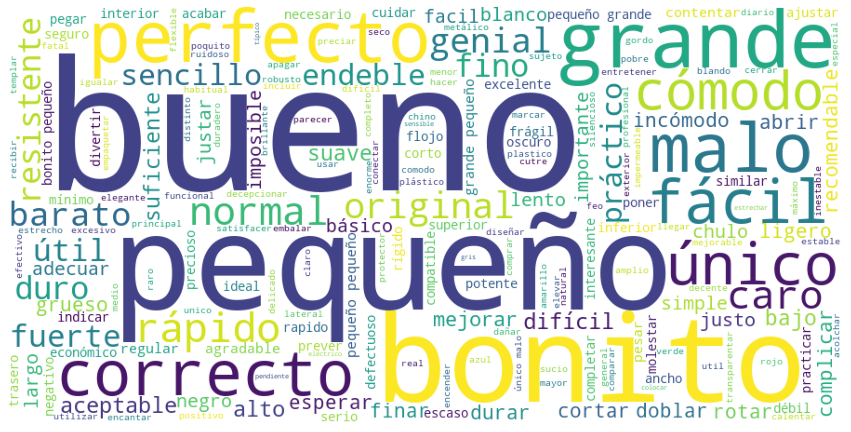

In [128]:
ver_wordcloud(todas_reviews_3)

# Preprocesamiento

## Importamos el dataset de entrenamiento

Importo dataset que será utilizado para train y me quedo con las columnas relevantes. <br>

## Información Importante: <br> 

- En el notebook de "Procesamiento" se muestra el trabajo realizado para llegar a un único dataset filtrado por las columnas relevantes y que contengan también las lemmatizaciones y stemmizaciones de cada review concatenada a su título. ***Ése es el set de datos que importamos para ahorrar tiempo de ejecución.***

In [129]:
# Importamos dataset limpio
data = pd.read_json("dataset_amazon/dataset_amazon_clean.json", lines = False)
print("- Cantidad de filas total del set:", data.shape[0])
print("- Cantidad de filas nulas por columna:")
data.isna().sum()

- Cantidad de filas total del set: 210000
- Cantidad de filas nulas por columna:


product_category    0
review_title        0
review_body         0
stars               0
revs_lemma          0
revs_stem           0
dtype: int64

##### Tokenización <br>
Si bien el dataset ya esta limpio, tomo una reseña al azar y aplico funciones y objetos de la librería spacy para explorarlos.

In [130]:
# Reseña al azar:
random_index = np.random.randint(0,data.shape[0])
review = data.review_body.iloc[random_index]
title = data.review_title.iloc[random_index]
print('- ID:', random_index,'\n' + '- Título:','\n' + '- Reseña:', review)
print('- Valoración:',data.stars[random_index])
print('- Categoría:', data.product_category[random_index])

- ID: 89320 
- Título: 
- Reseña: Es cómodo y lo he usado para la lluvia
- Valoración: 3
- Categoría: home


In [131]:
# Muestro las POS de la review elegida
sent = nlp(review)
print("{0:20}{1:20}".format("PALABRA:","POS:"))
for token in sent:
    print("{0:20}{1:20}".format(token.text,token.pos_))

PALABRA:            POS:                
Es                  AUX                 
cómodo              ADJ                 
y                   CCONJ               
lo                  PRON                
he                  AUX                 
usado               VERB                
para                ADP                 
la                  DET                 
lluvia              NOUN                


In [132]:
# Visualización de los POS
from spacy import displacy
displacy.render(sent, style="dep")

##### Lemmatizer <br>
Se hace un analisis de esta función de la libreria spacy con la reseña al azar

In [133]:
# Tokens lemmatizados de la review elegida
print("{0:20}{1:20}{2:20}".format("PALABRA:","POS:","LEMMA:"))
for token in sent:
    print("{0:20}{1:20}{2:20}".format(token.text,token.pos_,token.lemma_))

PALABRA:            POS:                LEMMA:              
Es                  AUX                 Es                  
cómodo              ADJ                 cómodo              
y                   CCONJ               y                   
lo                  PRON                el                  
he                  AUX                 haber               
usado               VERB                usar                
para                ADP                 parir               
la                  DET                 lo                  
lluvia              NOUN                lluvia              


In [134]:
#Función para limpieza de datos con lemmatizer
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [135]:
# Lemmatizamos y filtramos la review escogida
print("[ RESEÑA ORIGINAL ] :", review)
clean_review = text_data_lemma(review)
clean_review = " ".join(clean_review)
print("\n[ RESEÑA LEMMATIZADA ] :", clean_review)

[ RESEÑA ORIGINAL ] : Es cómodo y lo he usado para la lluvia

[ RESEÑA LEMMATIZADA ] : cómodo usar lluvia


##### Stemmizer <br>


In [136]:
# Importo objeto de nltk que me permite stemmizar en español
from nltk.stem.snowball import SpanishStemmer
stemmer = SpanishStemmer()

In [137]:
# Pruebo el stemmer en review al azar
sent = nlp(review)
print("{0:20}{1:20}{2:20}".format("PALABRA:","POS:","STEM:"))
for token in sent:
    print("{0:20}{1:20}{2:20}".format(token.text,token.pos_,stemmer.stem(token.text)))

PALABRA:            POS:                STEM:               
Es                  AUX                 es                  
cómodo              ADJ                 comod               
y                   CCONJ               y                   
lo                  PRON                lo                  
he                  AUX                 he                  
usado               VERB                usad                
para                ADP                 par                 
la                  DET                 la                  
lluvia              NOUN                lluvi               


In [138]:
# Función para limpieza de datos con stemmer
def text_data_stem(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = stemmer.stem(token.text).strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [139]:
# Filtros y stemmizo la reseña escogida
print("[ RESEÑA ORIGINAL ] :", review)
clean_review = text_data_stem(review)
clean_review = " ".join(clean_review)
print("\n[ RESEÑA STEMMIZADA ] :", clean_review)

[ RESEÑA ORIGINAL ] : Es cómodo y lo he usado para la lluvia

[ RESEÑA STEMMIZADA ] : comod usad lluvi


##### El proceso de Lemmatizar y Stemmizar las reseñas ya se realizo en el notebook adjunto, paso siguiente:<br>

### Vectorización

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=50000 # Determina máximo de palabras que toma para hacer la matriz
min_df = 0.01 # Toma todas las palabras que tengan un minimo de frecuencia del 0.01

tfidf = TfidfVectorizer(max_features=max_features, min_df=min_df)

##### Separo datasets lemma y stem

In [141]:
# Columnas de interés del dataset LEMMA
data.loc[:,('revs_lemma','stars')].head()

,revs_lemma,stars
0,mala comprar grande aparatoso protector pantalla,1
1,recibir recibir pedir devolución,1
2,apretar bien manillar tengo buscar sistema fun...,1
3,brocas mantequilla broca menor diámetro doblar...,1
4,gustar gustar olor viejo aspecto malo,1


In [142]:
# Columnas de interés del dataset STEM
data.loc[:,('revs_stem','stars')].head()

,revs_stem,stars
0,mal compr grand aparat protector pantall,1
1,recib recib ped devolu,1
2,apriet bien manill teng busc sistem funcion bi...,1
3,broc mantequill broc menor diametr dobl manteq...,1
4,gust gust olor viej aspect mal,1


##### Pruebo primero con las reviews lemmatizadas, pero bien podría cambiarse por las stemmizadas comentando y descomentando líneas.

In [148]:
## LEMMA
# list_revs = list(data['revs_lemma'].values)
# stars = data['stars'].values

## STEM
list_revs = list(data['revs_stem'].values)
stars = data['stars'].values

list_revs[:5]

['mal compr grand aparat protector pantall',
 'recib recib ped devolu',
 'apriet bien manill teng busc sistem funcion bien abrazader agarr manill apriet bien desliz lintern abaj',
 'broc mantequill broc menor diametr dobl mantequill minim presion dobl enderez exterior amarill interior fund gris compr',
 'gust gust olor viej aspect mal']

### Train-Test split de los datos <br>
Usare el 70% para entrenamiento y el 30% para prueba. Luego vectorizare cada set por separado para evitar data leaks.

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(list_revs,stars,test_size=0.3,random_state=42,stratify=stars)
print("- Tamaño del set de entrenamiento:", len(X_train))
print("- Tamaño del set de prueba:", len(X_test))
print("- Algunos ejemplos del set de entrenamiento:")
X_train[:5]

- Tamaño del set de entrenamiento: 147000
- Tamaño del set de prueba: 63000
- Algunos ejemplos del set de entrenamiento:


['perfect naveg multimedi teng potenci salon habit quier silenci poquisim espaci suficient soltur naveg vide youtub consult red social bast sobr',
 'agujere dia flot piscin roz bord unic posibil accident',
 'cumpl expect comod util necesari cam nid',
 'pequeñ gat genial perr pequeñ',
 'lament correct product tuv esper seman fech inicial entreg reclam unic solucion esper cancel ped lament']

### Generación de la matriz

In [150]:
# Ajusto el vectorizador y transformo los datos de entrenamiento
matriz_train = tfidf.fit_transform(X_train)
matriz_train

<147000x187 sparse matrix of type '<class 'numpy.float64'>'
	with 763370 stored elements in Compressed Sparse Row format>

In [151]:
# Visualizo las palabras utilizadas (ordenadas alfabéticamente)
all_words = tfidf.get_feature_names()
print("Palabras más usadas:",all_words[:150])

Palabras más usadas: ['acab', 'adapt', 'ademas', 'agu', 'aguant', 'ajust', 'articul', 'años', 'baj', 'barat', 'bat', 'bien', 'bols', 'bonit', 'boton', 'buen', 'busc', 'cabl', 'caj', 'calid', 'cam', 'cambi', 'car', 'carg', 'cas', 'coch', 'coloc', 'color', 'comod', 'complet', 'compr', 'conect', 'content', 'correct', 'cort', 'cos', 'cristal', 'cubr', 'cuest', 'cumpl', 'decepcion', 'dej', 'descripcion', 'despeg', 'devolu', 'devolv', 'devuelt', 'dia', 'dias', 'dificil', 'diner', 'diseñ', 'dud', 'dur', 'encaj', 'encant', 'entreg', 'envi', 'esper', 'estrell', 'excelent', 'expect', 'facil', 'fall', 'falt', 'fech', 'fin', 'form', 'fot', 'fuert', 'funcion', 'fund', 'general', 'genial', 'graci', 'grand', 'gust', 'hij', 'hor', 'imag', 'indic', 'instal', 'instruccion', 'jueg', 'just', 'libr', 'liger', 'limpi', 'lleg', 'llev', 'luz', 'mal', 'man', 'mand', 'marc', 'material', 'med', 'mejor', 'mes', 'model', 'mont', 'movil', 'muy', 'necesit', 'niñ', 'normal', 'not', 'opcion', 'opinion', 'original', 'p

In [152]:
# Transformo los datos de prueba en base al vectorizador ya entrenado
matriz_test = tfidf.transform(X_test)
matriz_test

<63000x187 sparse matrix of type '<class 'numpy.float64'>'
	with 325439 stored elements in Compressed Sparse Row format>

### Modelización

In [153]:
# Importamos modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [154]:
xtrain = matriz_train.toarray()
xtest = matriz_test.toarray()

# Para la validación cruzada neceitamos el set entero
X = tfidf.transform(list_revs)
X = X.toarray()
y = stars

#### Métricas de evluación

In [155]:
from sklearn.metrics import classification_report # Para un reporte con precision, recall y f1_score
from sklearn.metrics import accuracy_score

Voy a utilizar el accuracy score para evaluar en general la precisión del multiclasificador, ya que genera un promedio entre todas las clases (que en el dataset están balancedas en cantidad) y hace un ajuste entre precisión y recall.

Como complemento, utilizare el Calssification report para ver cómo varían la precisión y el recall por clase.

También se elaboro función para visualizar la matriz de confusión de cada modelo.

In [156]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["1 star","2 stars","3 stars","4 stars","5 stars"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(7,7))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Validación cruzada

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def k_validacion_cruzada(model,x,y,k):
    scores = cross_val_score(model, x, y, cv=k)
    print("%0.2f de precisión con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

<br>

### Naive Bayes - Modelo Benchmark

In [158]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

y_pred = nb.predict(xtest)
print('Accuracy : ', accuracy_score(ytest,y_pred))

Accuracy :  0.3979365079365079


In [159]:
print('Validación cruzada:')
k_validacion_cruzada(nb,X,stars,5)

Validación cruzada:
0.40 de precisión con desviación estándar de 0.00


In [160]:
print('Reporte de clasificación : ' + '\n \n' ,classification_report(ytest, y_pred, target_names=['1','2','3','4','5']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

           1       0.49      0.63      0.55     12600
           2       0.36      0.25      0.29     12600
           3       0.33      0.20      0.25     12600
           4       0.36      0.20      0.26     12600
           5       0.38      0.70      0.50     12600

    accuracy                           0.40     63000
   macro avg       0.38      0.40      0.37     63000
weighted avg       0.38      0.40      0.37     63000



Las métricas del reporte se ven explicadas en la matriz de confusión

Matriz de confusión : 


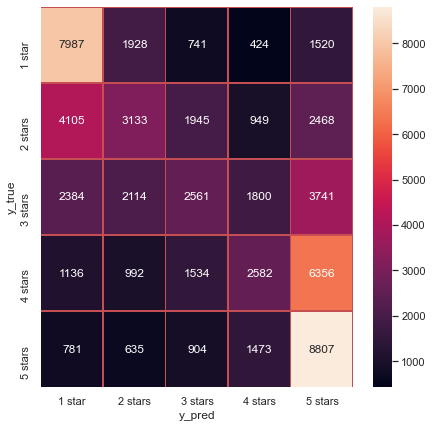

In [161]:
print('Matriz de confusión : ')
confusion(ytest,y_pred)

Vemos que los mayores aciertos están en las de 1 y 5 estrellas. Aún así, existen bastantes de 5 estrellas que predijo como de 1. Esto podría deberse a que usan palabras parecidas, tanto para hablar positivamente como diciendo que "no" son así.

También vemos que hay gran confusión también entre los de 4 y 5 estrellas y los de 1 y 2 estrellas. Es entendible porque hay mucho parecido entre ellas.

Finalmente, el de 3 estrellas es el que más fácilmente se confunde con los demás ya que es la media y tiene palabras que se repiten en todas las reseñas.

<br>

### Random Forest

In [162]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

y_pred = rf.predict(xtest)
print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.42782539682539683


In [163]:
print('Validación cruzada:')
k_validacion_cruzada(rf,X,stars,5)

Validación cruzada:
0.43 de precisión con desviación estándar de 0.00


In [164]:
print('Reporte de clasificación : ' + '\n \n' ,classification_report(ytest, y_pred, target_names=['1','2','3','4','5']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

           1       0.54      0.61      0.57     12600
           2       0.35      0.32      0.34     12600
           3       0.33      0.32      0.32     12600
           4       0.38      0.35      0.36     12600
           5       0.51      0.54      0.53     12600

    accuracy                           0.43     63000
   macro avg       0.42      0.43      0.42     63000
weighted avg       0.42      0.43      0.42     63000



Las métricas del reporte se ven explicadas en la matriz de confusión.

Matriz de confusión : 


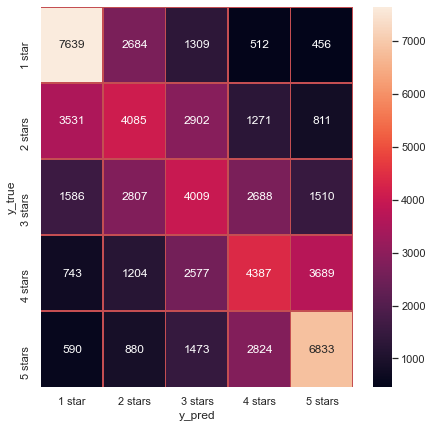

In [165]:
print('Matriz de confusión : ')
confusion(ytest,y_pred)

Se nota una mejora ocnsiderable en la identificación de cada clase, e incluso se redujo en un buen porcentaje la confusión entre los extremos 1-2 y 4-5.

También mejoró la distinción entre 5 y 1, lo mismo que se ajustó la predicción de los 3: ya no hay tanta confusión con las demás clases.

#### Feature importances

Algo muy bueno de Random Forest es que puede indicar la importancia de los features que se usan para clasificar. Veamos en este caso cuáles son las palabras que mayormente determinan el el valor de una review para este clasificador.

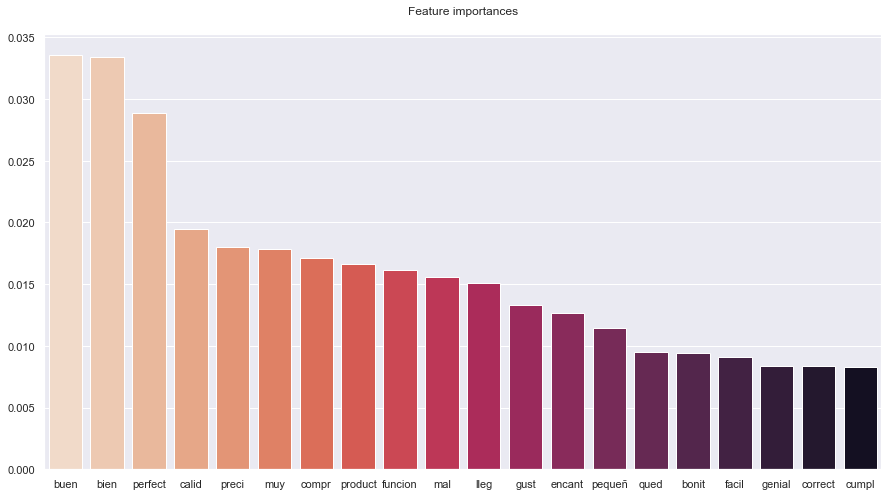

In [166]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = tfidf.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices] # 
selected_importances = importances[indices] # 

# Por ultimo graficamos
plt.figure(figsize = (15,8))
plt.title(label='Feature importances',pad=20)
sns.barplot(x=selected_columns, y=selected_importances,palette='rocket_r')
plt.show()

<br>

### SVM

In [167]:
# En vez de utilizar SVC, vamos a usar LinearSVC, 
# ya que para el Kernel Lineal esta función es MUCHO mas rapida que la tradicional SVC.

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)

y_pred = svc.predict(xtest)
print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.4460952380952381


In [168]:
print('Validación cruzada:')
k_validacion_cruzada(svc,X,stars,5)

Validación cruzada:
0.45 de precisión con desviación estándar de 0.00


In [169]:
print('Reporte de clasificación : ' + '\n \n' ,classification_report(ytest, y_pred, target_names=['1','2','3','4','5']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

           1       0.49      0.72      0.58     12600
           2       0.38      0.29      0.33     12600
           3       0.36      0.28      0.31     12600
           4       0.41      0.33      0.37     12600
           5       0.51      0.62      0.56     12600

    accuracy                           0.45     63000
   macro avg       0.43      0.45      0.43     63000
weighted avg       0.43      0.45      0.43     63000



Las métricas del reporte se ven explicadas en la matriz de confusión.

Matriz de confusión : 


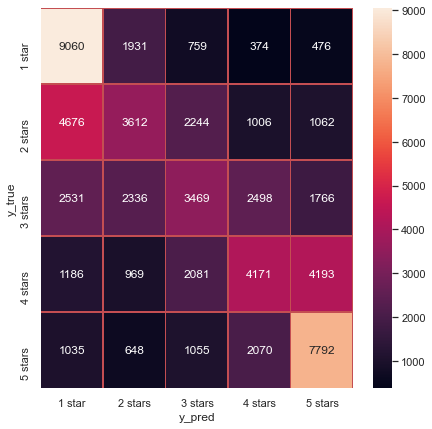

In [170]:
print('Matriz de confusión : ')
confusion(ytest,y_pred)

Si bien mejora considerablemente la predicción en los extremos, empeora respecto del random forest en las predicciones de la clase de 3 estrellas. En los casos de las falsas predicciones de 1 y 5 para reviews que son de 3 puede suponerse que es porque son ambiguas y no logra identificar a cuál extremo pertenecen, por lo que les asigna un punto medio.

#### Comparación modelos Lemma vs Stem



- El benchmark con el dataset lemmatizado tiene casi el mismo rendimiento con las clases 1 y 5 que el SVM Lineal con el dataset stemmizado. Pero en las clases intermedias lo supera ampliamente este último.<br>

- Random Forest es apenas más preciso con el dataset stemmizado que con el lemmatizado. Sin embargo, empeora su recall. <br>

- El SVC, en ambos casos, es el que tiene el mejor rendimiento. Pero analizando en profundidad, el SVC con el dataset stem tiene mejor precisión y recall en todas las clases.

#### Conclusión: SVC con dataset stem <br>
Por su rendimiento general y en cada clase en partiuclar, buscaremos optimizar este modelo para aumentar su accuracy

### Optimización de hiperparámetros del SVC

Para encontrar los valores que maximizan el rendimiento del modelo, vamos a realizar la optimización tanto del SVC como del Vectorizador, ya que las palabras utilizadas para la clasificación influyen en el desempeño del modelo. <br>

Para el vectorizador utilizaremos la estrategia manual para encontrar el mínimo valor de frecuencia de palabras (max_df) que filtre a las que serán utilizadas para la vectorización. <br>

En cambio, para optimizar el modelo utilizaremos Grid Search y encontraremos los valores de C y el kernel que maximicen su accuracy.

#### Búsqueda manual

##### Vectorizer

In [171]:
scores_train = []
scores_test = []
max_features = 15000
list_min_df = [0.00001,0.0001,0.0005,0.001,0.01]
svc = LinearSVC(C = 1)

for value in list_min_df:
    tfidfop = TfidfVectorizer(max_features=max_features, min_df=value)
    mxtrain = tfidfop.fit_transform(X_train)
    mxtest = tfidfop.transform(X_test)
    
    xtrain = mxtrain.toarray()
    xtest = mxtest.toarray()
    
    svc.fit(xtrain,ytrain)
    
    y_pred_train = svc.predict(xtrain)
    y_pred_test = svc.predict(xtest)
    
    scores_train.append(accuracy_score(ytrain, y_pred_train))
    scores_test.append(accuracy_score(ytest, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

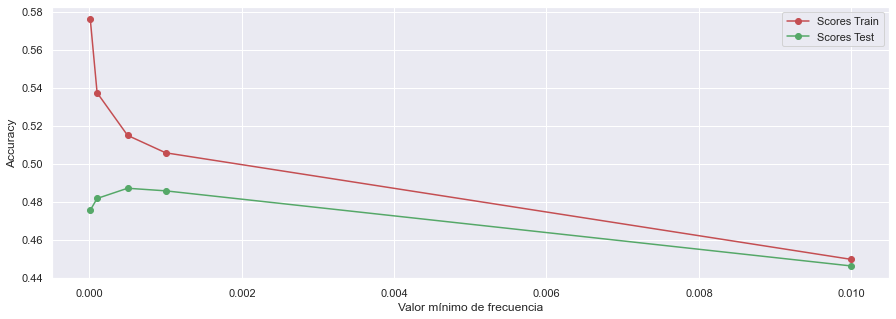

In [172]:
plt.figure(figsize=(15,5))
plt.plot(list_min_df,scores_train,'o-', label = 'Scores Train', c='r')
plt.plot(list_min_df,scores_test,'o-', label = 'Scores Test', c='g')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Valor mínimo de frecuencia')
plt.show()

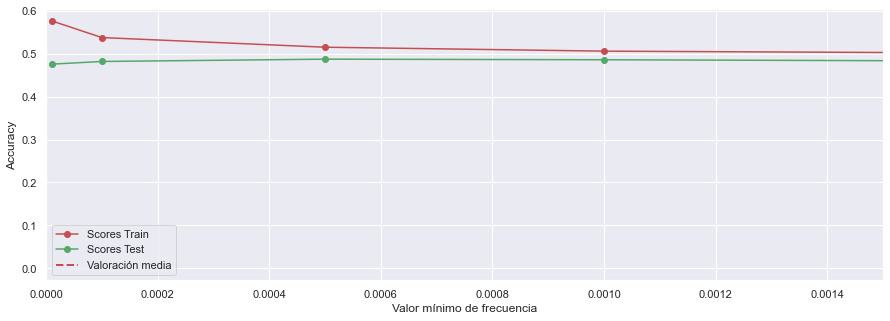

In [173]:
#cte = np.ones(max(scores_train))
plt.figure(figsize=(15,5))
plt.plot(list_min_df,scores_train,'o-', label = 'Scores Train', c='r')
plt.plot(list_min_df,scores_test,'o-', label = 'Scores Test', c='g')
plt.plot(0.001, ls = '--', lw = 2, c='r',label = 'Valoración media')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Valor mínimo de frecuencia')
plt.xlim(0,0.0015)
plt.show()

Haciendo zoom en la zona que tiene mayor accuracy en el conjunto de test vemos que fue obtenido con el valor min_df = 0.001 Además, es el que menos separado está del accuracy del conjunto de train. Por tanto, éste es el valor óptimo.<br>

Ahora pasamos a optimizar los hiperparámetros del modelo SVC Lineal utilizando el método de Grid Search.

#### Grid Search

#### Optimización del modelo SVC

In [174]:
# Grilla para Grid Search
# param_grid = {'C':[1,1.5,2,2.5,3]}
param_grid = {'C':[0.01,0.1,1,1.1]}

# Grid Search
from sklearn.model_selection import GridSearchCV
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid)

In [175]:
# Vectorizador optimizado
tfidfop = TfidfVectorizer(max_features=15000, min_df=0.001)
mxtrain = tfidfop.fit_transform(X_train)
mxtest = tfidfop.transform(X_test)

xtrain = mxtrain.toarray()
xtest = mxtest.toarray()
mxtrain

<147000x1376 sparse matrix of type '<class 'numpy.float64'>'
	with 1299055 stored elements in Compressed Sparse Row format>

In [176]:
# Entrenamiento
model.fit(xtrain, ytrain)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 1.1]})

In [177]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'C': 0.01}
Mejor Score: 0.4834625850340136



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.450488,0.171513,0.151889,0.034956,0.01,{'C': 0.01},0.484184,0.482007,0.483503,0.482415,0.485204,0.483463,0.001164,1
1,4.629113,0.153598,0.146856,0.015935,0.1,{'C': 0.1},0.484048,0.482415,0.482449,0.482211,0.483299,0.482884,0.000691,2
2,10.743859,0.224586,0.159210,0.026653,1,{'C': 1},0.482721,0.480578,0.480510,0.481088,0.482755,0.481531,0.001006,3
3,12.152658,0.450251,0.150763,0.021618,1.1,{'C': 1.1},0.482857,0.480578,0.480442,0.481054,0.482653,0.481517,0.001033,4


#### Evaluación del modelo optimizado

Los datos se vectorizan con el tfidfop con un min_df = 0.001 y max_features = 15000. <br>
Luego se entrena un modelo LinearSVCcon C = 0.1.

In [178]:
svcop = LinearSVC(C=0.01)
svcop.fit(xtrain,ytrain)

y_pred = svcop.predict(xtest)
print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.48747619047619045


In [179]:
print('Reporte de clasificación : ' + '\n \n' ,classification_report(ytest, y_pred, target_names=['1','2','3','4','5']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

           1       0.56      0.73      0.63     12600
           2       0.41      0.36      0.39     12600
           3       0.40      0.31      0.35     12600
           4       0.44      0.36      0.39     12600
           5       0.55      0.68      0.61     12600

    accuracy                           0.49     63000
   macro avg       0.47      0.49      0.47     63000
weighted avg       0.47      0.49      0.47     63000



Matriz de confusión : 


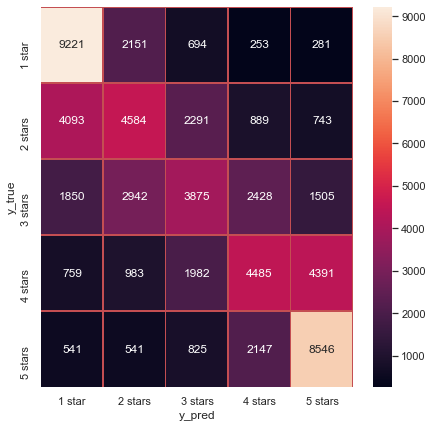

In [180]:
print('Matriz de confusión : ')
confusion(ytest,y_pred)

<br>

## Conclusión de la optimización

Lo mejor que se pudo obtener con los hiperparámetros óptimos establecidos es una precisión casi del 50%. Si bien este valor es relativamente bajo, está al límite del rendimiento aceptable, ya que acertará en la mitad de las predicciones de cada clase. <br>

Como vimos en la matriz de confusión, los más fáciles de identificar son las clases extremos y los más conflictivos son el 2 y el 4, ya que se los confunde en gran cantidad de casos con el 1 y el 5, respectivamente. <br>

En cuanto a la clase 3, tiene el accuracy más bajo pero es el mejor rendimiento comparado con los otros modelos en esa clase.

# Investigación

Como líneas futuras de investigación, para aumentar el rendimiento del modelo, me gustaría:

1. Poder involucrar las categorías de los productos para entrenar los modelos, ya que puede haber palabras que tengan más relevancia en una categoría que en otras.
2. Explorar n-gramas de palabras para entrenar. Como vimos en las nubes de palabras, las más frecuentes en las clases de 1 y 5 estrellas son parecidas ('bueno', 'perfecto', 'grande', 'recomendable') pero analizar en qué contexto se escriben dichas palabras (las palabras que la acompañan) puede darnos mucha información sobre sis e usa negativa o positivamente. Creo que podría ser muy provechoso para el proyecto.
3. Explorar pipelines de trabajo para automatizar los procesos vectorización y entrenamiento. Por las características de la PC que estoy utilizando no me fue podible realizar esto en simultáneo ya que consumía demasiados recursos. Pero con alguna tecnología en la nube o una mejor máquina podría implementarse.
4. Formas de realizar una limpieza más exahustiva de los datos, ya que existen casos donde quedaron emojis intercalados con el texto o palabras mal escritas que confunden al modelo e incluso son interpretadas con un diferente POS.

### Si pudiera rehacer algo:
1. Entrenaria y optimizaria el random forest stemmizado.
2. Probaria usar solo adjetivos, para validar si mejora el desempeño.

In [181]:
# 1. Entrenaría y optimizaría el random forest stemmizado

# Vectorizador optimizado
tfidfop = TfidfVectorizer(max_features=15000, min_df=0.001)
mxtrain = tfidfop.fit_transform(X_train)
mxtest = tfidfop.transform(X_test)

xtrain = mxtrain.toarray()
xtest = mxtest.toarray()

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

y_pred = rf.predict(xtest)
print('Accuracy : ', accuracy_score(ytest, y_pred))

Accuracy :  0.4638095238095238


Como vemos, habiendo optimizado el vectorizador ya mejora el rendimiento del Random forest haciéndolo pasar de 0.42 de accuracy a 0.46. 

In [183]:
# 2. Probaría usar sólo adjetivos, a ver si mejora el desempeño

# Importo dataset limpio
data = pd.read_json("dataset_amazon/dataset_amazon_clean.json", lines = False)
data.head()

,product_category,review_title,review_body,stars,revs_lemma,revs_stem
0,wireless,Mala compra,"Malisimo, muy grande demasiado aparatoso y mal...",1,mala comprar grande aparatoso protector pantalla,mal compr grand aparat protector pantall
1,apparel,No lo he recibido,No he recibido el pedido no la devolución,1,recibir recibir pedir devolución,recib recib ped devolu
2,sports,Que no aprieta bien en el manillar,"Tengo que buscar otro sistema, este no funcion...",1,apretar bien manillar tengo buscar sistema fun...,apriet bien manill teng busc sistem funcion bi...
3,home_improvement,Brocas de mantequilla,Utilicé las brocas de menor diámetro y se me d...,1,brocas mantequilla broca menor diámetro doblar...,broc mantequill broc menor diametr dobl manteq...
4,beauty,No me gusta,No me gusta su olor a viejo y aspecto malo,1,gustar gustar olor viejo aspecto malo,gust gust olor viej aspect mal


In [184]:
# Analizo las 10 primeras filas del dataset filtradas por sus adjetivos:

def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ == 'ADJ' and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

# Limpiamos todas las reviews con lemmatizer
adjs_lemma = []
for i in np.arange(0,11):
    rev = text_data_lemma(data.review_title.iloc[i] + ' ' + data.review_body.iloc[i])
    adjs_lemma.append(" ".join(rev))
adjs_lemma[:10]

['mala grande aparatoso',
 '',
 '',
 'menor mínimo doblar amarillo gris',
 'viejo malo',
 '',
 'imaginar aleatorio único',
 'bajo',
 'entregar',
 '']

Como se puede observar hay reseñas sin adjetivos (ver ejemplo arriba), se debe buscar otra alternativa.